Design Rates
Palled Unload = 15 Pallets/hour
Fluid Unload = 840 Packages/hour
National Feeder = 22 Pallets/hour
National Inductor = 800 packages/hour
National Pallet = 209 Packages/hour
National Fluid = 273 packages/hour
Poly_Sort_NC = 160 Packages/hour
Non_con_NC = 36 Packages/hour
Pallet Load_NC = 9 Pallets/hour
TLMD Partition = 148 packages/hour
tlmd feeder = 15 pallets/hour
tlmd inductor = 300 packages/hour
tlmd sort = 84 packages/hour
tlmd cart handoff = 22 carts/hour


Assumed ratios
40 NC Box Packages = 1 Pallet
500 NC Poly Packages = 1 Pallet
15 NC Non-Con Packages = 1 Pallet
60 TLMD Boxes = 1 Pallet
150 TLMD Poly = 1 Pallet
5 TLMD Non-con Packages = 1 Pallet
T20 TLMD packages = 1 cart
55 Inbound Packages = 1 Inbound Pallet 

In [ ]:
from scipy.optimize import linprog

inbound_pallet_to_package_conversion = 55 #Packages/pallet
NC_pallet_to_package_conversion = 40 #Packages/pallet
tlmd_pallet_to_package_conversion = 60
tlmd_cart_to_packages_conversion = 20


#all rates converted to packages/hour
pallet_unload = 15 * inbound_pallet_to_package_conversion
fluid_unload = 840
national_feeder = 22 * inbound_pallet_to_package_conversion 
national_inductor = 800
national_pallet_box = 209
national_fluid = 273
Poly_Sort_NC = 160
Non_con_NC = 36
pallet_Load_NC = 9 * NC_pallet_to_package_conversion
tLMD_partition = 148
tlmd_feeder = 15 * tlmd_pallet_to_package_conversion
tlmd_inductor = 300
tlmd_sort = 84
tlmd_cart_handoff = 22 * tlmd_cart_to_packages_conversion

salary_rate = 21.5

line_haul_packages = 9081
TFC_packages = 1821
tlmd_packages = 7280
NC_packages = 3622
NC_box = NC_packages*.743
NC_poly = NC_packages*.214
NC_non_con = NC_packages*.043


# Define the hourly rates for each station (example values)
hourly_rates = [salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate, 
                salary_rate,
                salary_rate,
                salary_rate
                ]

# Define the packages per hour rate for each station (example values)
packages_per_hour = [pallet_unload, 
                    fluid_unload, 
                    national_feeder, 
                    national_inductor, 
                    national_pallet_box, 
                    national_fluid, 
                    Poly_Sort_NC, 
                    Non_con_NC, 
                    pallet_Load_NC, 
                    tLMD_partition, 
                    tlmd_feeder, 
                    tlmd_inductor,
                    tlmd_sort,
                    tlmd_cart_handoff
                    ]

# Define the number of packages to be processed through each station (example values)
packages_processed = [line_haul_packages, # number of packages non-TFC
                    TFC_packages,  # number of packages TFC
                    line_haul_packages, # number of packages non-TFC
                    line_haul_packages + TFC_packages, # number of packages total
                    NC_box, #number of NC boxes
                    NC_box, #number of NC boxes
                    NC_poly, #number of NC poly
                    NC_non_con, #number of NC non-con
                    NC_box+NC_poly+NC_non_con, #number of total NC packages
                    tlmd_packages, #number of total TLMD packages
                    tlmd_packages, #number of total TLMD packages
                    tlmd_packages,#number of total TLMD packages
                    tlmd_packages, #number of total TLMD packages
                    tlmd_packages #number of total TLMD packages
                    ]

# Number of stations
num_stations = len(hourly_rates)

# Objective function coefficients (hourly rates)
c = hourly_rates

# Inequality constraints matrix (number of hours at a station times the packages per hour rate)
A = [[-packages_per_hour[i] if i == j else 0 for j in range(num_stations)] for i in range(num_stations)]

# Inequality constraints vector (negative number of packages processed through those stations)
b = [-packages_processed[i] for i in range(num_stations)]

# Bounds for each variable (number of hours at each station must be non-negative)
x_bounds = [(0, None) for _ in range(num_stations)]

# Solve the linear programming problem
result = linprog(c=c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Print the results
if result.success:
    print(f"Optimal number of hours at each station: {result.x}")
    PPH = (line_haul_packages + TFC_packages) / sum(result.x)
    print(f"Optimal packages per hour: {PPH}")
    print(f"Minimum cost: {result.fun}")
else:
    print("Optimization failed.")

In [ ]:
import pulp

# Define the conversion rates and packages per hour
inbound_pallet_to_package_conversion = 55
NC_pallet_to_package_conversion = 40
tlmd_pallet_to_package_conversion = 60
tlmd_cart_to_packages_conversion = 20

# All rates converted to packages/hour
pallet_unload = 15 * inbound_pallet_to_package_conversion
fluid_unload = 840
national_feeder = 22 * inbound_pallet_to_package_conversion 
national_inductor = 800
national_pallet_box = 209
national_fluid = 273
Poly_Sort_NC = 160
Non_con_NC = 36
pallet_Load_NC = 9 * NC_pallet_to_package_conversion
tLMD_partition = 148
tlmd_feeder = 15 * tlmd_pallet_to_package_conversion
tlmd_inductor = 300
tlmd_sort = 84
tlmd_cart_handoff = 22 * tlmd_cart_to_packages_conversion

salary_rate = 21.5

line_haul_packages = 9081
TFC_packages = 1821
tlmd_packages = 7280
NC_packages = 3622
NC_box = NC_packages * 0.743
NC_poly = NC_packages * 0.214
NC_non_con = NC_packages * 0.043

# Define the hourly rates for each station
hourly_rates = [salary_rate] *14

# Define the packages per hour rate for each station
packages_per_hour = [pallet_unload, fluid_unload, national_feeder, national_inductor, national_pallet_box, national_fluid, 
                     Poly_Sort_NC, Non_con_NC, pallet_Load_NC, tLMD_partition, tlmd_feeder, tlmd_inductor, tlmd_sort, tlmd_cart_handoff]

# Define the number of packages to be processed through each station
packages_processed = [line_haul_packages, TFC_packages, line_haul_packages, line_haul_packages + TFC_packages, NC_box, NC_box, 
                      NC_poly, NC_non_con, NC_box + NC_poly + NC_non_con, tlmd_packages, tlmd_packages, tlmd_packages, tlmd_packages, tlmd_packages]

# Create a problem variable
prob = pulp.LpProblem("StaffingProblem", pulp.LpMinimize)

# Decision variables for hours at each station
hours = [pulp.LpVariable(f'hours_{i}', lowBound=0, cat='Continuous') for i in range(len(hourly_rates))]

# Binary decision variables for staffing options
x = pulp.LpVariable('x', cat='Binary')  # national_fluid
y = pulp.LpVariable('y', cat='Binary')  # national_pallet_box

# Objective function (minimize total salary cost)
prob += pulp.lpSum([hourly_rates[i] * hours[i] for i in range(len(hourly_rates))])

# Constraints for packages processed
for i in range(len(packages_per_hour)):
    prob += hours[i] * packages_per_hour[i] >= packages_processed[i]

# Binary decision constraints
prob += x + y == 1, "OneStaffingOption"
prob += hours[5] >= 1 * x, "MinStaffFluid"  # national_fluid
prob += hours[4] >= 1 * y, "MinStaffPalletBox"  # national_pallet_box

# Solve the problem
prob.solve()

# Print the results
print(f"Status: {pulp.LpStatus[prob.status]}")
for i in range(len(hours)):
    print(f"Optimal number of hours at station {i}: {hours[i].varValue}")
print(f"Minimum cost: {pulp.value(prob.objective)}")
print(f"Decision variable for national_pallet_box (y): {y.varValue}")
print(f"Decision variable for national_fluid (x): {x.varValue}")


In [ ]:
from pyscipopt import Model, quicksum

# Define the conversion rates and packages per hour
inbound_pallet_to_package_conversion = 55
NC_pallet_to_package_conversion = 40
tlmd_pallet_to_package_conversion = 60
tlmd_cart_to_packages_conversion = 20

# All rates converted to packages/hour
pallet_unload = 15 * inbound_pallet_to_package_conversion
fluid_unload = 840
national_feeder = 22 * inbound_pallet_to_package_conversion 
national_inductor = 800
national_pallet_box = 209
national_fluid = 273
Poly_Sort_NC = 160
Non_con_NC = 36
pallet_Load_NC = 9 * NC_pallet_to_package_conversion
tLMD_partition = 148
tlmd_feeder = 15 * tlmd_pallet_to_package_conversion
tlmd_inductor = 300
tlmd_sort = 84
tlmd_cart_handoff = 22 * tlmd_cart_to_packages_conversion

salary_rate = 21.5

line_haul_packages = 9081
TFC_packages = 1821
tlmd_packages = 7280
NC_packages = 3622
NC_box = NC_packages * 0.743
NC_poly = NC_packages * 0.214
NC_non_con = NC_packages * 0.043

# Define the hourly rates for each station
hourly_rates = [salary_rate] * 14

# Define the packages per hour rate for each station
packages_per_hour = [pallet_unload, fluid_unload, national_feeder, national_inductor, national_pallet_box, national_fluid, 
                     Poly_Sort_NC, Non_con_NC, pallet_Load_NC, tLMD_partition, tlmd_feeder, tlmd_inductor, tlmd_sort, tlmd_cart_handoff]

# Define the number of packages to be processed through each station
packages_processed = [line_haul_packages, TFC_packages, line_haul_packages, line_haul_packages + TFC_packages, NC_box, NC_box, 
                      NC_poly, NC_non_con, NC_box + NC_poly + NC_non_con, tlmd_packages, tlmd_packages, tlmd_packages, tlmd_packages, tlmd_packages]

# Create a SCIP model
model = Model("StaffingProblem")

# Decision variables for hours at each station
hours = [model.addVar(f'hours_{i}', lb=0) for i in range(len(hourly_rates))]

# Binary decision variables for staffing options
x = model.addVar('x', vtype='B')  # national_fluid
y = model.addVar('y', vtype='B')  # national_pallet_box

# Objective function (minimize total salary cost)
model.setObjective(quicksum(hourly_rates[i] * hours[i] for i in range(len(hourly_rates))), "minimize")

# Constraints for packages processed
for i in range(len(packages_per_hour)):
    model.addCons(hours[i] * packages_per_hour[i] >= packages_processed[i])

# Binary decision constraints
model.addCons(x + y == 1, "OneStaffingOption")
model.addCons(hours[5] >= 1 * x, "MinStaffFluid")  # national_fluid
model.addCons(hours[4] >= 1 * y, "MinStaffPalletBox")  # national_pallet_box

# Solve the problem
model.optimize()

# Print the results
if model.getStatus() == "optimal":
    print(f"Status: {model.getStatus()}")
    for i in range(len(hours)):
        print(f"Optimal number of hours at station {i}: {model.getVal(hours[i])}")
    print(f"Minimum cost: {model.getObjVal()}")
    print(f"Decision variable for national_pallet_box (y): {model.getVal(y)}")
    print(f"Decision variable for national_fluid (x): {model.getVal(x)}")
else:
    print(f"Problem could not be solved to optimality. Status: {model.getStatus()}")


Nonlinear Mixed Integer Program for whole process

In [11]:
import pandas as pd
#demands = pd.read_csv('volumestuff.csv')
demands = [[10000,7000,3000,1000]]


In [12]:
from gurobipy import Model, GRB, quicksum
rate_tracker = []
real_rate_tracker = []
#for index, demand in demands.iterrows():
for demand in demands:
    line_haul_packages = demand[0]
    TFC_packages = demand[3]
    tlmd_packages = demand[1]
    NC_packages = demand[2]
    # Define the conversion rates and packages per hour
    inbound_pallet_to_package_conversion = 55
    NC_pallet_to_package_conversion = 40
    tlmd_pallet_to_package_conversion = 60
    tlmd_cart_to_packages_conversion = 20

    # All rates converted to packages/hour
    pallet_unload = 15 * inbound_pallet_to_package_conversion
    fluid_unload = 840
    national_feeder = 22 * inbound_pallet_to_package_conversion 
    national_inductor = 800
    national_pallet_box = 209
    USPS_fluid = 273
    UPSN_fluid = 273
    FDEG_fluid = 273
    Poly_Sort_USPS = 160
    Poly_Sort_UPSN = 160
    Poly_Sort_FDEG = 160
    Non_con_USPS = 36
    Non_con_UPSN = 36
    Non_con_FDEG = 36
    pallet_Load_USPS = 9 * NC_pallet_to_package_conversion
    pallet_Load_UPSN = 9 * NC_pallet_to_package_conversion
    pallet_Load_FDEG = 9 * NC_pallet_to_package_conversion
    tlmd_partition = 148

    tlmd_feeder_1 = 15 * tlmd_pallet_to_package_conversion
    tlmd_inductor_1 = 300
    tlmd_sort_1 = 84
    tlmd_feeder_2 = 15 * tlmd_pallet_to_package_conversion
    tlmd_inductor_2 = 300
    tlmd_sort_2 = 84
    tlmd_feeder_3 = 15 * tlmd_pallet_to_package_conversion
    tlmd_inductor_3 = 300
    tlmd_sort_3 = 84

    tlmd_cart_handoff_1 = 22 * tlmd_cart_to_packages_conversion
    tlmd_cart_handoff_2 = 22 * tlmd_cart_to_packages_conversion
    tlmd_cart_handoff_3 = 22 * tlmd_cart_to_packages_conversion

    salary_rate = 21.5

    total_TMs = 60
    
    NC_box = NC_packages * 0.743
    NC_poly = NC_packages * 0.214
    NC_non_con = NC_packages * 0.043

    NC_box_USPS = NC_box * 0.5
    NC_box_UPSN = NC_box * 0.3
    NC_box_FDEG = NC_box * 0.2

    NC_poly_USPS = NC_poly * 0.5
    NC_poly_UPSN = NC_poly * 0.3
    NC_poly_FDEG = NC_poly * 0.2


    NC_non_con_USPS = NC_non_con * 0.5
    NC_non_con_UPSN = NC_non_con * 0.3
    NC_non_con_FDEG = NC_non_con * 0.2

    tlmd_packages_p1 = tlmd_packages * 0.5
    tlmd_packages_p2 = tlmd_packages * 0.3
    tlmd_packages_p3 = tlmd_packages * 0.2

    # Define the hourly rates for each station
    hourly_rates_1 = [salary_rate] * 18
    hourly_rates_2 = [salary_rate] * 9
    hourly_rates_3 = [salary_rate] * 3

    # Create a Gurobi model
    model = Model("StaffingProblem")

    # Binary decision variables for fluid options
    x = model.addVar(vtype=GRB.BINARY, name='x')  # national_fluid_USPS
    y = model.addVar(vtype=GRB.BINARY, name='y')  # national_fluid_UPSN
    z = model.addVar(vtype=GRB.BINARY, name='z')  # national_fluid_FDEG
    w = model.addVar(vtype=GRB.BINARY, name='w')  # national_fluid_FDEG

    # Define the packages per hour rate for each station
    packages_per_hour_1 = [pallet_unload, fluid_unload, national_feeder, national_inductor, national_pallet_box, USPS_fluid, UPSN_fluid, FDEG_fluid, 
                        Poly_Sort_USPS, Poly_Sort_UPSN, Poly_Sort_FDEG, Non_con_USPS, Non_con_UPSN, Non_con_FDEG, pallet_Load_USPS, pallet_Load_UPSN, 
                        pallet_Load_FDEG, tlmd_partition]

    packages_per_hour_2 = [tlmd_feeder_1, tlmd_inductor_1, tlmd_sort_1, tlmd_feeder_2, tlmd_inductor_2, tlmd_sort_2, tlmd_feeder_3, tlmd_inductor_3, tlmd_sort_3]

    packages_per_hour_3 = [tlmd_cart_handoff_1, tlmd_cart_handoff_2, tlmd_cart_handoff_3]

    # Define the number of packages to be processed through each station
    packages_processed_1 = [line_haul_packages, 
                            TFC_packages, 
                            line_haul_packages, 
                            line_haul_packages, 
                            NC_box - x*NC_box_USPS - y*NC_box_UPSN - z*NC_box_FDEG, 
                            x * NC_box_USPS, 
                            y * NC_box_UPSN, 
                            z * NC_box_FDEG, 
                            NC_poly_USPS, 
                            NC_poly_UPSN, 
                            NC_poly_FDEG, 
                            NC_non_con_USPS, 
                            NC_non_con_UPSN, 
                            NC_non_con_FDEG, 
                            (1-x)*NC_box_USPS + NC_poly_USPS + NC_non_con_USPS,
                            (1-y)*NC_box_UPSN + NC_poly_UPSN + NC_non_con_UPSN,
                            (1-z)*NC_box_FDEG + NC_poly_FDEG + NC_non_con_FDEG, 
                            tlmd_packages]

    packages_processed_2 = [tlmd_packages_p1, tlmd_packages_p1, tlmd_packages_p1,tlmd_packages_p2, tlmd_packages_p2, tlmd_packages_p2,tlmd_packages_p3, tlmd_packages_p3, tlmd_packages_p3]

    packages_processed_3 = [tlmd_packages_p1, tlmd_packages_p2, tlmd_packages_p3]

    big_M = 1000
    # Decision variables for hours at each station
    hours_1 = [model.addVar(lb=0, name=f'hours_{i}') for i in range(len(hourly_rates_1))]
    hours_2 = [model.addVar(lb=0, name=f'hours_{i}') for i in range(len(hourly_rates_2))]
    hours_3 = [model.addVar(lb=0, name=f'hours_{i}') for i in range(len(hourly_rates_3))]

    # Decision variable for number of  team members at each station
    TMs_1 = [model.addVar(vtype=GRB.INTEGER, lb=0, name=f'TMs_{i}') for i in range(len(hourly_rates_1))]
    TMs_2 = [model.addVar(vtype=GRB.INTEGER, lb=0, name=f'TMs_{i}') for i in range(len(hourly_rates_2))]
    TMs_3 = [model.addVar(vtype=GRB.INTEGER, lb=0, name=f'TMs_{i}') for i in range(len(hourly_rates_3))]

    # Objective function (minimize total salary cost)
    model.setObjective(quicksum(TMs_1[i] * hourly_rates_1[i] * hours_1[i] for i in range(len(hourly_rates_1))) +
                    quicksum(TMs_2[j] * hourly_rates_2[j] * hours_2[j] for j in range(len(hourly_rates_2))) + 
                    quicksum(TMs_3[k] * hourly_rates_3[k] * hours_3[k] for k in range(len(hourly_rates_3))), GRB.MINIMIZE)

    # Constraint to ensure all packages processed
    for i in range(len(packages_per_hour_1)):
        model.addConstr(TMs_1[i] * hours_1[i] * packages_per_hour_1[i] >= packages_processed_1[i])
    for j in range(len(packages_per_hour_2)):
        model.addConstr(TMs_2[j] * hours_2[j] * packages_per_hour_2[j] >= packages_processed_2[j])
    for k in range(len(packages_per_hour_3)):
        model.addConstr(TMs_3[k] * hours_3[k] * packages_per_hour_3[k] >= packages_processed_3[k])

    # Constraint for total number of team members used
    model.addConstr(quicksum(TMs_1[i] for i in range(len(hourly_rates_1))) <= total_TMs)
    model.addConstr(quicksum(TMs_2[j] for j in range(len(hourly_rates_2))) <= total_TMs)
    model.addConstr(quicksum(TMs_3[k] for k in range(len(hourly_rates_3))) <= total_TMs)

    #Total Team Members and shift hours constraints
    model.addConstr(quicksum(TMs_1[i] * hours_1[i] for i in range(len(packages_per_hour_1))) +
                    quicksum(TMs_2[j] * hours_2[j] for j in range(len(packages_per_hour_2))) +
                    quicksum(TMs_3[k] * hours_3[k] for k in range(len(packages_per_hour_3))) <= total_TMs * 10)

    for i in range(len(packages_per_hour_1)):
        model.addConstr(hours_1[i] <= 20)
    for i in range(len(packages_per_hour_2)):
        model.addConstr(hours_2[i] <= 20)
    for i in range(len(packages_per_hour_3)):
        model.addConstr(hours_3[i] <= 20)

    # Fluid load staffing constraints
    model.addConstr(TMs_1[5] >= 3 - big_M * (1 - x))
    model.addConstr(TMs_1[5] <= big_M * x)

    model.addConstr(TMs_1[6] >= 3 - big_M * (1 - y))
    model.addConstr(TMs_1[6] <= big_M * y)

    model.addConstr(TMs_1[7] >= 3 - big_M * (1 - z))
    model.addConstr(TMs_1[7] <= big_M * z)


    #continuous process constraints
    model.addConstr(hours_1[17] == hours_1[0] + hours_1[1]) #
    model.addConstr(hours_1[2] == hours_1[0]) #
    model.addConstr(hours_1[3] == hours_1[0]) #

    model.addConstr(hours_1[5] == hours_1[3] * x) #
    model.addConstr(hours_1[6] == hours_1[3] * y) #
    model.addConstr(hours_1[7] == hours_1[3] * z) #


    model.addConstr(hours_2[1] == hours_2[0])
    model.addConstr(hours_2[2] == hours_2[0])

    model.addConstr(hours_2[4] == hours_2[3])
    model.addConstr(hours_2[5] == hours_2[3])

    model.addConstr(hours_2[7] == hours_2[6])
    model.addConstr(hours_2[8] == hours_2[6])

    # pick off related process minimum personnel
    model.addConstr(TMs_1[11]>=2)
    model.addConstr(TMs_2[2]>=5)
    model.addConstr(TMs_2[5]>=5)
    model.addConstr(TMs_2[8]>=5)

    #based on MSP need for linehauls to arrive over 4.25 hours, and 0.5-0.75 hours
    model.addConstr(hours_1[0]>= 5)

    #need to have 3 people dedicated to fluid unload
    model.addConstr(TMs_1[1]>= 3)

    #critical pull time for national carrier fluid load
    #if done fluid
    model.addConstr(hours_1[5] <= 10*x) #
    model.addConstr(hours_1[6] <= 20*y) #
    model.addConstr(hours_1[7] <= 6.5*z) #

    #noncon sort and pallet load complete before critical pull time
    model.addConstr(hours_1[14] + hours_1[11] <= 10*(1-x))
    model.addConstr(hours_1[15] + hours_1[12] <= 20*(1-y))
    model.addConstr(hours_1[16] + hours_1[13] <= 6.5*(1-x))

    #National Induct line complete before critical pull time
    model.addConstr(hours_1[3] <= 10*(1-x))
    model.addConstr(hours_1[3] <= 20*(1-y))
    model.addConstr(hours_1[3] <= 6.5*(1-x))

    #poly sort and pallet load complete before critical pull time
    model.addConstr(hours_1[14] + hours_1[8] <= 10*(1-x))
    model.addConstr(hours_1[15] + hours_1[9] <= 20*(1-y))
    model.addConstr(hours_1[16] + hours_1[10] <= 6.5*(1-x))

    #critical pull times for tlmd partitions
    model.addConstr(hours_1[17] + hours_2[2] <= 11)
    model.addConstr(hours_1[17] + hours_2[2] + hours_2[5] <= 14.5)
    model.addConstr(hours_1[17] + hours_2[2] + hours_2[5] + hours_2[8] <= 17)

    #constraints to allow for NC pallet load
    model.addConstr(w <= x)
    model.addConstr(w <= y)
    model.addConstr(w <= z)
    model.addConstr(w >= x + y + z - 2)
    model.addConstr(hours_1[4] == hours_1[3] * (1 - w))

    #minimum number of personnel to conduct handoffs
    model.addConstr(TMs_3[0] >= 12)
    model.addConstr(TMs_3[1] >= 12)
    model.addConstr(TMs_3[2] >= 12)

    model.setParam('MIPGap', 0.09)
    # Solve the problem
    model.optimize()

    # Print the results
    if model.status == GRB.OPTIMAL:
        print(f"Status: {model.status}")
        
        print(f"demand: {demand}")
        for i in range(len(hours_1)):
            print(f"Optimal number of hours at station {i}: {hours_1[i].x}")
        for i in range(len(TMs_1)):
            print(f"Optimal number of team members at station {i}: {TMs_1[i].x}") 
        for j in range(len(hours_2)):
            print(f"Optimal number of hours at station {j}: {hours_2[j].x}")
        for j in range(len(TMs_2)):
            print(f"Optimal number of team members at station {j}: {TMs_2[j].x}")
        for k in range(len(hours_3)):
            print(f"Optimal number of hours at station {k}: {hours_3[k].x}")
        for k in range(len(TMs_3)):
            print(f"Optimal number of team members at station {k}: {TMs_3[k].x}")
        print(f"Minimum cost: {model.objVal}")
        print(f"Decision variable for national_fluid_USPS (y): {x.x}")
        print(f"Decision variable for national_fluid_UPSN (x): {y.x}")
        print(f"Decision variable for national_fluid_FDEG (z): {z.x}")
        Total_hours  = sum([hours_1[i].x*TMs_1[i].x for i in range(len(hours_1))])+sum([hours_2[j].x*TMs_2[j].x for j in range(len(hours_2))])+sum([hours_3[k].x*TMs_3[k].x for k in range(len(hours_3))])
        print(f"Total Hours {Total_hours}")
        print(f'Design Rate Optimal Pacakges per Hour: {(TFC_packages + line_haul_packages) / Total_hours}')

        rate_tracker.append((TFC_packages + line_haul_packages) / Total_hours)
        real_rate_tracker.append((TFC_packages + line_haul_packages) / (Total_hours/.85))
    else:
        print(f"Problem could not be solved to optimality. Status: {model.status}")


Set parameter MIPGap to value 0.09
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 76 rows, 64 columns and 149 nonzeros
Model fingerprint: 0x97664f3e
Model has 30 quadratic objective terms
Model has 35 quadratic constraints
Variable types: 30 continuous, 34 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  QMatrix range    [1e+00, 1e+03]
  QLMatrix range   [1e+00, 1e+03]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 1e+03]
  QRHS range       [3e+01, 1e+04]
Presolve removed 51 rows and 7 columns
Presolve time: 0.21s
Presolved: 87 rows, 87 columns, 309 nonzeros
Presolved model has 27 quadratic constraint(s)
Presolved model has 28 bilinear constraint(

In [ ]:
rate = pd.DataFrame(rate_tracker)
rate.to_csv('rateresults.csv')

In [6]:
from gurobipy import Model, GRB, quicksum

# Define the conversion rates and packages per hour
inbound_pallet_to_package_conversion = 55
NC_pallet_to_package_conversion = 40
tlmd_pallet_to_package_conversion = 60
tlmd_cart_to_packages_conversion = 20

# All rates converted to packages/hour
pallet_unload = 15 * inbound_pallet_to_package_conversion
fluid_unload = 840
national_feeder = 22 * inbound_pallet_to_package_conversion 
national_inductor = 800
national_pallet_box = 209
USPS_fluid = 273
UPSN_fluid = 273
FDEG_fluid = 273
Poly_Sort_USPS = 160
Poly_Sort_UPSN = 160
Poly_Sort_FDEG = 160
Non_con_USPS = 36
Non_con_UPSN = 36
Non_con_FDEG = 36
pallet_Load_USPS = 9 * NC_pallet_to_package_conversion
pallet_Load_UPSN = 9 * NC_pallet_to_package_conversion
pallet_Load_FDEG = 9 * NC_pallet_to_package_conversion
tlmd_partition = 148

tlmd_feeder_1 = 15 * tlmd_pallet_to_package_conversion
tlmd_inductor_1 = 300
tlmd_sort_1 = 84
tlmd_feeder_2 = 15 * tlmd_pallet_to_package_conversion
tlmd_inductor_2 = 300
tlmd_sort_2 = 84
tlmd_feeder_3 = 15 * tlmd_pallet_to_package_conversion
tlmd_inductor_3 = 300
tlmd_sort_3 = 84

tlmd_cart_handoff_1 = 22 * tlmd_cart_to_packages_conversion
tlmd_cart_handoff_2 = 22 * tlmd_cart_to_packages_conversion
tlmd_cart_handoff_3 = 22 * tlmd_cart_to_packages_conversion

salary_rate = 21.5

total_TMs = 40

line_haul_packages = 9081
TFC_packages = 1821
tlmd_packages = 9081
NC_packages = 0

NC_box = NC_packages * 0.743
NC_poly = NC_packages * 0.214
NC_non_con = NC_packages * 0.043

NC_box_USPS = NC_box * 0.5
NC_box_UPSN = NC_box * 0.3
NC_box_FDEG = NC_box * 0.2

NC_poly_USPS = NC_poly * 0.5
NC_poly_UPSN = NC_poly * 0.3
NC_poly_FDEG = NC_poly * 0.2


NC_non_con_USPS = NC_non_con * 0.5
NC_non_con_UPSN = NC_non_con * 0.3
NC_non_con_FDEG = NC_non_con * 0.2

tlmd_packages_p1 = tlmd_packages * 0.5
tlmd_packages_p2 = tlmd_packages * 0.3
tlmd_packages_p3 = tlmd_packages * 0.2

# Define the hourly rates for each station
hourly_rates_1 = [salary_rate] * 18
hourly_rates_2 = [salary_rate] * 9
hourly_rates_3 = [salary_rate] * 3

# Create a Gurobi model
model = Model("StaffingProblem")

# Binary decision variables for fluid options
x = model.addVar(vtype=GRB.BINARY, name='x')  # national_fluid_USPS
y = model.addVar(vtype=GRB.BINARY, name='y')  # national_fluid_UPSN
z = model.addVar(vtype=GRB.BINARY, name='z')  # national_fluid_FDEG
w = model.addVar(vtype=GRB.BINARY, name='w')  # national_fluid_FDEG

# Define the packages per hour rate for each station
packages_per_hour_1 = [pallet_unload, fluid_unload, national_feeder, national_inductor, national_pallet_box, USPS_fluid, UPSN_fluid, FDEG_fluid, 
                     Poly_Sort_USPS, Poly_Sort_UPSN, Poly_Sort_FDEG, Non_con_USPS, Non_con_UPSN, Non_con_FDEG, pallet_Load_USPS, pallet_Load_UPSN, 
                     pallet_Load_FDEG, tlmd_partition]

packages_per_hour_2 = [tlmd_feeder_1, tlmd_inductor_1, tlmd_sort_1, tlmd_feeder_2, tlmd_inductor_2, tlmd_sort_2, tlmd_feeder_3, tlmd_inductor_3, tlmd_sort_3]

packages_per_hour_3 = [tlmd_cart_handoff_1, tlmd_cart_handoff_2, tlmd_cart_handoff_3]

# Define the number of packages to be processed through each station
packages_processed_1 = [line_haul_packages, 
                        TFC_packages, 
                        line_haul_packages, 
                        line_haul_packages, 
                        NC_box - x*NC_box_USPS - y*NC_box_UPSN - z*NC_box_FDEG, 
                        x * NC_box_USPS, 
                        y * NC_box_UPSN, 
                        z * NC_box_FDEG, 
                        NC_poly_USPS, 
                        NC_poly_UPSN, 
                        NC_poly_FDEG, 
                        NC_non_con_USPS, 
                        NC_non_con_UPSN, 
                        NC_non_con_FDEG, 
                        (1-x)*NC_box_USPS + NC_poly_USPS + NC_non_con_USPS,
                        (1-y)*NC_box_UPSN + NC_poly_UPSN + NC_non_con_UPSN,
                        (1-z)*NC_box_FDEG + NC_poly_FDEG + NC_non_con_FDEG, 
                        tlmd_packages]

packages_processed_2 = [tlmd_packages_p1, tlmd_packages_p1, tlmd_packages_p1,tlmd_packages_p2, tlmd_packages_p2, tlmd_packages_p2,tlmd_packages_p3, tlmd_packages_p3, tlmd_packages_p3]

packages_processed_3 = [tlmd_packages_p1, tlmd_packages_p2, tlmd_packages_p3]

big_M = 1000
# Decision variables for hours at each station
hours_1 = [model.addVar(lb=0, name=f'hours_{i}') for i in range(len(hourly_rates_1))]
hours_2 = [model.addVar(lb=0, name=f'hours_{i}') for i in range(len(hourly_rates_2))]
hours_3 = [model.addVar(lb=0, name=f'hours_{i}') for i in range(len(hourly_rates_3))]

# Decision variable for number of  team members at each station
TMs_1 = [model.addVar(vtype=GRB.INTEGER, lb=0, name=f'TMs_{i}') for i in range(len(hourly_rates_1))]
TMs_2 = [model.addVar(vtype=GRB.INTEGER, lb=0, name=f'TMs_{i}') for i in range(len(hourly_rates_2))]
TMs_3 = [model.addVar(vtype=GRB.INTEGER, lb=0, name=f'TMs_{i}') for i in range(len(hourly_rates_3))]

# Objective function (minimize total salary cost)
model.setObjective(quicksum(TMs_1[i] * hourly_rates_1[i] * hours_1[i] for i in range(len(hourly_rates_1))) +
                   quicksum(TMs_2[j] * hourly_rates_2[j] * hours_2[j] for j in range(len(hourly_rates_2))) + 
                   quicksum(TMs_3[k] * hourly_rates_3[k] * hours_3[k] for k in range(len(hourly_rates_3))), GRB.MINIMIZE)

# Constraint to ensure all packages processed
for i in range(len(packages_per_hour_1)):
    model.addConstr(TMs_1[i] * hours_1[i] * packages_per_hour_1[i] >= packages_processed_1[i])
for j in range(len(packages_per_hour_2)):
    model.addConstr(TMs_2[j] * hours_2[j] * packages_per_hour_2[j] >= packages_processed_2[j])
for k in range(len(packages_per_hour_3)):
    model.addConstr(TMs_3[k] * hours_3[k] * packages_per_hour_3[k] >= packages_processed_3[k])

# Constraint for total number of team members used
model.addConstr(quicksum(TMs_1[i] for i in range(len(hourly_rates_1))) <= total_TMs)
model.addConstr(quicksum(TMs_2[j] for j in range(len(hourly_rates_2))) <= total_TMs)
model.addConstr(quicksum(TMs_3[k] for k in range(len(hourly_rates_3))) <= total_TMs)

#Total Team Members and shift hours constraints
model.addConstr(quicksum(TMs_1[i] * hours_1[i] for i in range(len(packages_per_hour_1))) +
                quicksum(TMs_2[j] * hours_2[j] for j in range(len(packages_per_hour_2))) +
                quicksum(TMs_3[k] * hours_3[k] for k in range(len(packages_per_hour_3))) <= total_TMs * 10)

for i in range(len(packages_per_hour_1)):
    model.addConstr(hours_1[i] <= 20)
for i in range(len(packages_per_hour_2)):
    model.addConstr(hours_2[i] <= 20)
for i in range(len(packages_per_hour_3)):
    model.addConstr(hours_3[i] <= 20)

# Fluid load staffing constraints
model.addConstr(TMs_1[5] >= 3 - big_M * (1 - x))
model.addConstr(TMs_1[5] <= big_M * x)

model.addConstr(TMs_1[6] >= 3 - big_M * (1 - y))
model.addConstr(TMs_1[6] <= big_M * y)

model.addConstr(TMs_1[7] >= 3 - big_M * (1 - z))
model.addConstr(TMs_1[7] <= big_M * z)


#continuous process constraints
model.addConstr(hours_1[17] == hours_1[0] + hours_1[1]) #
model.addConstr(hours_1[2] == hours_1[0]) #
model.addConstr(hours_1[3] == hours_1[0]) #

model.addConstr(hours_1[5] == hours_1[3] * x) #
model.addConstr(hours_1[6] == hours_1[3] * y) #
model.addConstr(hours_1[7] == hours_1[3] * z) #


model.addConstr(hours_2[1] == hours_2[0])
model.addConstr(hours_2[2] == hours_2[0])

model.addConstr(hours_2[4] == hours_2[3])
model.addConstr(hours_2[5] == hours_2[3])

model.addConstr(hours_2[7] == hours_2[6])
model.addConstr(hours_2[8] == hours_2[6])

# pick off related process minimum personnel
model.addConstr(TMs_1[11]>=2)
model.addConstr(TMs_2[2]>=5)
model.addConstr(TMs_2[5]>=5)
model.addConstr(TMs_2[8]>=5)

#based on MSP need for linehauls to arrive over 4.25 hours, and 0.5-0.75 hours
model.addConstr(hours_1[0]>= 5)

#need to have 3 people dedicated to fluid unload
model.addConstr(TMs_1[1]>= 3)

#critical pull time for national carrier fluid load
#if done fluid
model.addConstr(hours_1[5] <= 10*x) #
model.addConstr(hours_1[6] <= 20*y) #
model.addConstr(hours_1[7] <= 6.5*z) #

#noncon sort and pallet load complete before critical pull time
model.addConstr(hours_1[14] + hours_1[11] <= 10*(1-x))
model.addConstr(hours_1[15] + hours_1[12] <= 20*(1-y))
model.addConstr(hours_1[16] + hours_1[13] <= 6.5*(1-x))

#National Induct line complete before critical pull time
model.addConstr(hours_1[3] <= 10*(1-x))
model.addConstr(hours_1[3] <= 20*(1-y))
model.addConstr(hours_1[3] <= 6.5*(1-x))

#poly sort and pallet load complete before critical pull time
model.addConstr(hours_1[14] + hours_1[8] <= 10*(1-x))
model.addConstr(hours_1[15] + hours_1[9] <= 20*(1-y))
model.addConstr(hours_1[16] + hours_1[10] <= 6.5*(1-x))

#critical pull times for tlmd partitions
model.addConstr(hours_1[17] + hours_2[2] <= 11)
model.addConstr(hours_1[17] + hours_2[2] + hours_2[5] <= 14.5)
model.addConstr(hours_1[17] + hours_2[2] + hours_2[5] + hours_2[8] <= 17)

#constraints to allow for NC pallet load
model.addConstr(w <= x)
model.addConstr(w <= y)
model.addConstr(w <= z)
model.addConstr(w >= x + y + z - 2)
model.addConstr(hours_1[4] == hours_1[3] * (1 - w))

#minimum number of personnel to conduct handoffs
model.addConstr(TMs_3[0] >= 12)
model.addConstr(TMs_3[1] >= 12)
model.addConstr(TMs_3[2] >= 12)

model.setParam('MIPGap', 0.05)
# Solve the problem
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print(f"Status: {model.status}")
    for i in range(len(hours_1)):
        print(f"Optimal number of hours at station {i}: {hours_1[i].x}")
    for i in range(len(TMs_1)):
        print(f"Optimal number of team members at station {i}: {TMs_1[i].x}") 
    for j in range(len(hours_2)):
        print(f"Optimal number of hours at station {j}: {hours_2[j].x}")
    for j in range(len(TMs_2)):
        print(f"Optimal number of team members at station {j}: {TMs_2[j].x}")
    for k in range(len(hours_3)):
        print(f"Optimal number of hours at station {k}: {hours_3[k].x}")
    for k in range(len(TMs_3)):
        print(f"Optimal number of team members at station {k}: {TMs_3[k].x}")
    print(f"Minimum cost: {model.objVal}")
    print(f"Decision variable for national_fluid_USPS (y): {x.x}")
    print(f"Decision variable for national_fluid_UPSN (x): {y.x}")
    print(f"Decision variable for national_fluid_FDEG (z): {z.x}")
    Total_hours  = sum([hours_1[i].x*TMs_1[i].x for i in range(len(hours_1))])+sum([hours_2[j].x*TMs_2[j].x for j in range(len(hours_2))])+sum([hours_3[k].x*TMs_3[k].x for k in range(len(hours_3))])
    print(f"Total Hours {Total_hours}")
    print(f'Design Rate Optimal Pacakges per Hour: {(TFC_packages + line_haul_packages) / Total_hours}')
else:
    print(f"Problem could not be solved to optimality. Status: {model.status}")


Set parameter MIPGap to value 0.05
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 76 rows, 64 columns and 149 nonzeros
Model fingerprint: 0xc879e190
Model has 30 quadratic objective terms
Model has 35 quadratic constraints
Variable types: 30 continuous, 34 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  QMatrix range    [1e+00, 1e+03]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 1e+03]
  QRHS range       [4e+02, 9e+03]
Presolve removed 51 rows and 7 columns
Presolve time: 1.15s
Presolved: 87 rows, 87 columns, 291 nonzeros
Presolved model has 16 quadratic constraint(s)
Presolved model has 28 bilinear constraint(

Simple Linear Program

In [ ]:
from gurobipy import Model, GRB, quicksum

# Define the conversion rates and packages per hour
inbound_pallet_to_package_conversion = 55
NC_pallet_to_package_conversion = 40
tlmd_pallet_to_package_conversion = 60
tlmd_cart_to_packages_conversion = 20

# All rates converted to packages/hour
pallet_unload = 15 * inbound_pallet_to_package_conversion
fluid_unload = 840
national_feeder = 22 * inbound_pallet_to_package_conversion 
national_inductor = 800
national_pallet_box = 209
national_fluid = 273
Poly_Sort_NC = 160
Non_con_NC = 36
pallet_Load_NC = 9 * NC_pallet_to_package_conversion
tlmd_partition = 148
tlmd_feeder = 15 * tlmd_pallet_to_package_conversion
tlmd_inductor = 300
tlmd_sort = 84
tlmd_cart_handoff = 22 * tlmd_cart_to_packages_conversion

salary_rate = 21.5
big_M = 1000

line_haul_packages = 9081
TFC_packages = 1821
tlmd_packages = 7280
NC_packages = 3622
NC_box = NC_packages * 0.743
NC_poly = NC_packages * 0.214
NC_non_con = NC_packages * 0.043

# Define the hourly rates for each station
hourly_rates = [salary_rate] * 14

# Create a Gurobi model
model = Model("StaffingProblem")

x = model.addVar(name='x', vtype=GRB.BINARY)  # national_fluid
y = model.addVar(name='y', vtype=GRB.BINARY)  # national_pallet_box


# Define the packages per hour rate for each station
packages_per_hour = [pallet_unload, fluid_unload, national_feeder, national_inductor, national_pallet_box, national_fluid, 
                     Poly_Sort_NC, Non_con_NC, pallet_Load_NC, tlmd_partition, tlmd_feeder, tlmd_inductor, tlmd_sort, tlmd_cart_handoff]

# Define the number of packages to be processed through each station
packages_processed = [line_haul_packages, TFC_packages, line_haul_packages, line_haul_packages + TFC_packages, y*NC_box, x*NC_box, 
                      NC_poly, NC_non_con, x*NC_box + NC_poly + NC_non_con, tlmd_packages, tlmd_packages, tlmd_packages, tlmd_packages, tlmd_packages]

# Decision variables for hours at each station
hours = [model.addVar(lb = 0, name=f'hours_{i}') for i in range(len(hourly_rates))]

# Constraints for packages processed
for i in range(len(packages_per_hour)):
    model.addConstr(hours[i] * packages_per_hour[i] >= packages_processed[i])

# Binary decision constraints
model.addConstr(x + y == 1)

# Objective function (minimize total salary cost)
model.setObjective(quicksum(hourly_rates[i] * hours[i] for i in range(len(hourly_rates))), GRB.MINIMIZE)


# Optimize the model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print(f"Status: {model.status}")
    for i in range(len(hours)):
        print(f"Optimal number of hours at station {i}: {hours[i].x}")
    print(f"Minimum cost: {model.objVal}")
    print(f"Decision variable for national_pallet_box (y): {y.x}")
    print(f"Decision variable for national_fluid (x): {x.x}")
else:
    print(f"Problem could not be solved to optimality. Status: {model.status}")


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = 'prod_pred_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data = data.drop(columns=['Trial','Total LH'])
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target
scaler = StandardScaler()
x = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

# Optional: Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)



R^2: 0.9294313035180224
Coefficients: [-0.00214923  0.00236608  0.00401662]
Intercept: 48.66223208174871


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = 'prod_pred_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data = data.drop(columns=['Trial','Total LH'])
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target
scaler = StandardScaler()
x = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

# Optional: Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)



R^2: 0.48752772046534765
Coefficients: [-0.0014351   0.00194346]
Intercept: 53.51800144662744


R^2: 0.9294313035180224
Coefficients: [-0.00214923  0.00236608  0.00401662]
Intercept: 48.66223208174871


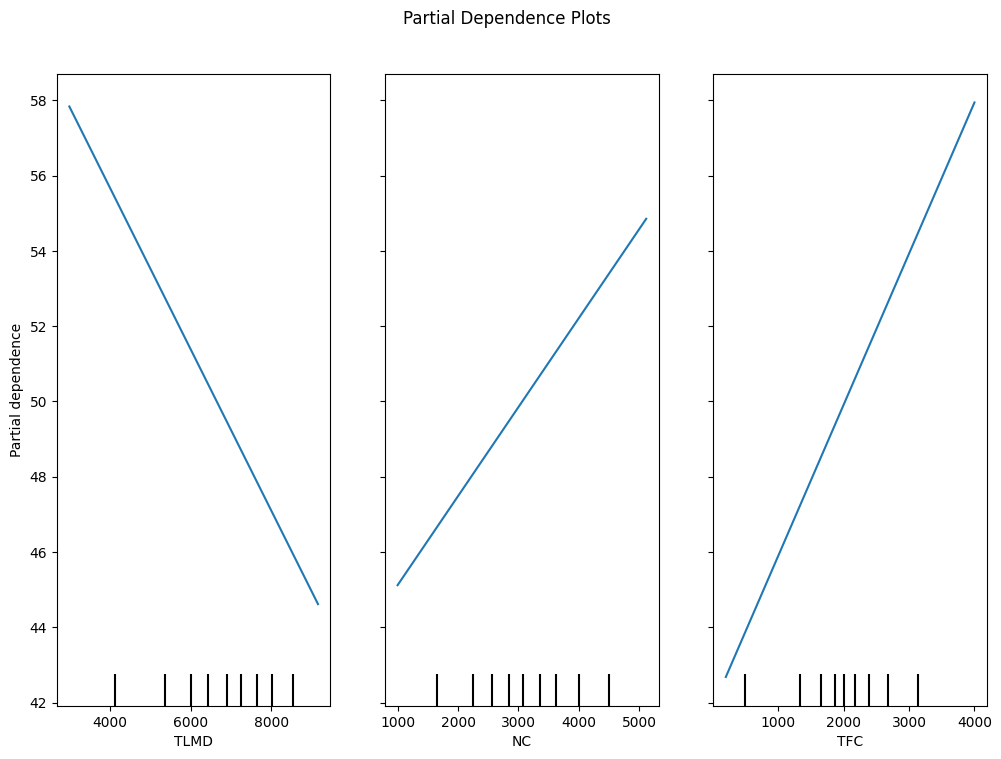

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'prod_pred_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data = data.drop(columns=['Trial','Total LH'])

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

# Optional: Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Plot partial dependence plots for the first three features
features = X.columns[:3]  # Select the first three features for partial dependence plots

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


R^2: 0.9833234990834556


c:\Users\fenst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


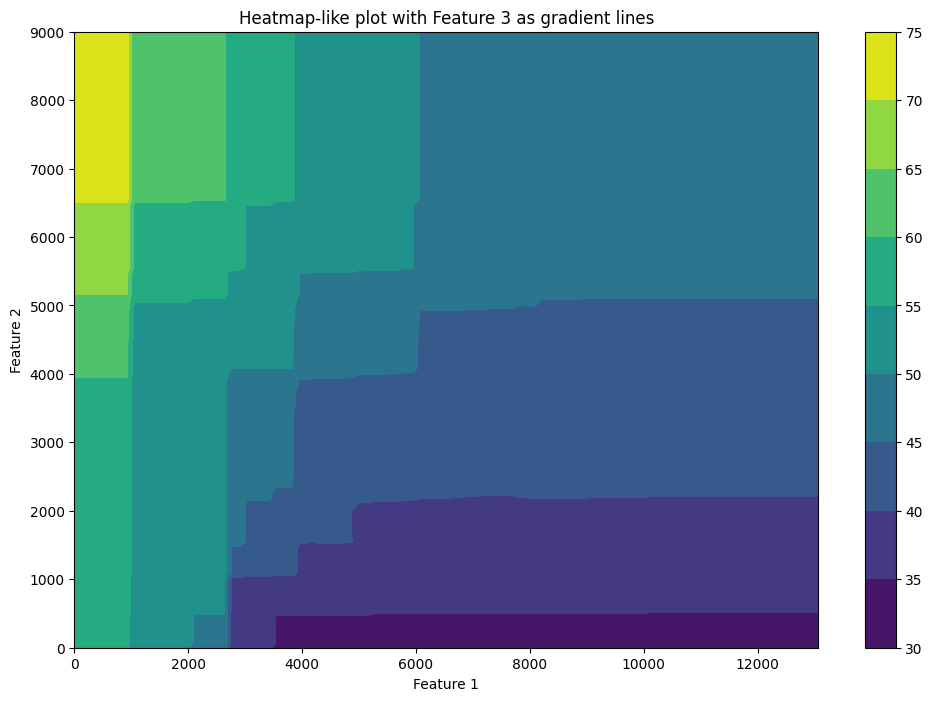

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = 'prod_pred_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data = data.drop(columns=['Trial','Total LH'])

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

# Create a meshgrid for the first two features
feature1_range = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
feature2_range = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100)
feature1_grid, feature2_grid = np.meshgrid(feature1_range, feature2_range)

# Predict using the model for each point in the meshgrid
predictions = model.predict(np.c_[feature1_grid.ravel(), feature2_grid.ravel(), np.zeros_like(feature1_grid.ravel())])
predictions = predictions.reshape(feature1_grid.shape)

# Plot the heatmap-like plot
plt.figure(figsize=(12, 8))
contour = plt.contourf(feature1_grid, feature2_grid, predictions, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heatmap-like plot with Feature 3 as gradient lines')
plt.show()
